In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('customer_segmentation.csv')

In [4]:
df.shape

(10127, 14)

In [5]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [7]:
df.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [42]:
df.corr()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266,-0.013983
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114,-0.105828
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135,0.172817
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532,0.272401
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541,-0.106230
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663,-0.015096
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503,-0.012652
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965,0.193528
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034,0.052497
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838,-0.024086


There is a medium/high correlation between credit limit and estimed income. The same is for months on book and age. Also, as expected the correlation between total_trans_count and amount is high. 

In [9]:
df_num=df[["age", "dependent_count", "estimated_income", "months_on_book", "total_relationship_count", "months_inactive_12_mon", "credit_limit", "total_trans_amount", "total_trans_count", "avg_utilization_ratio"]]    

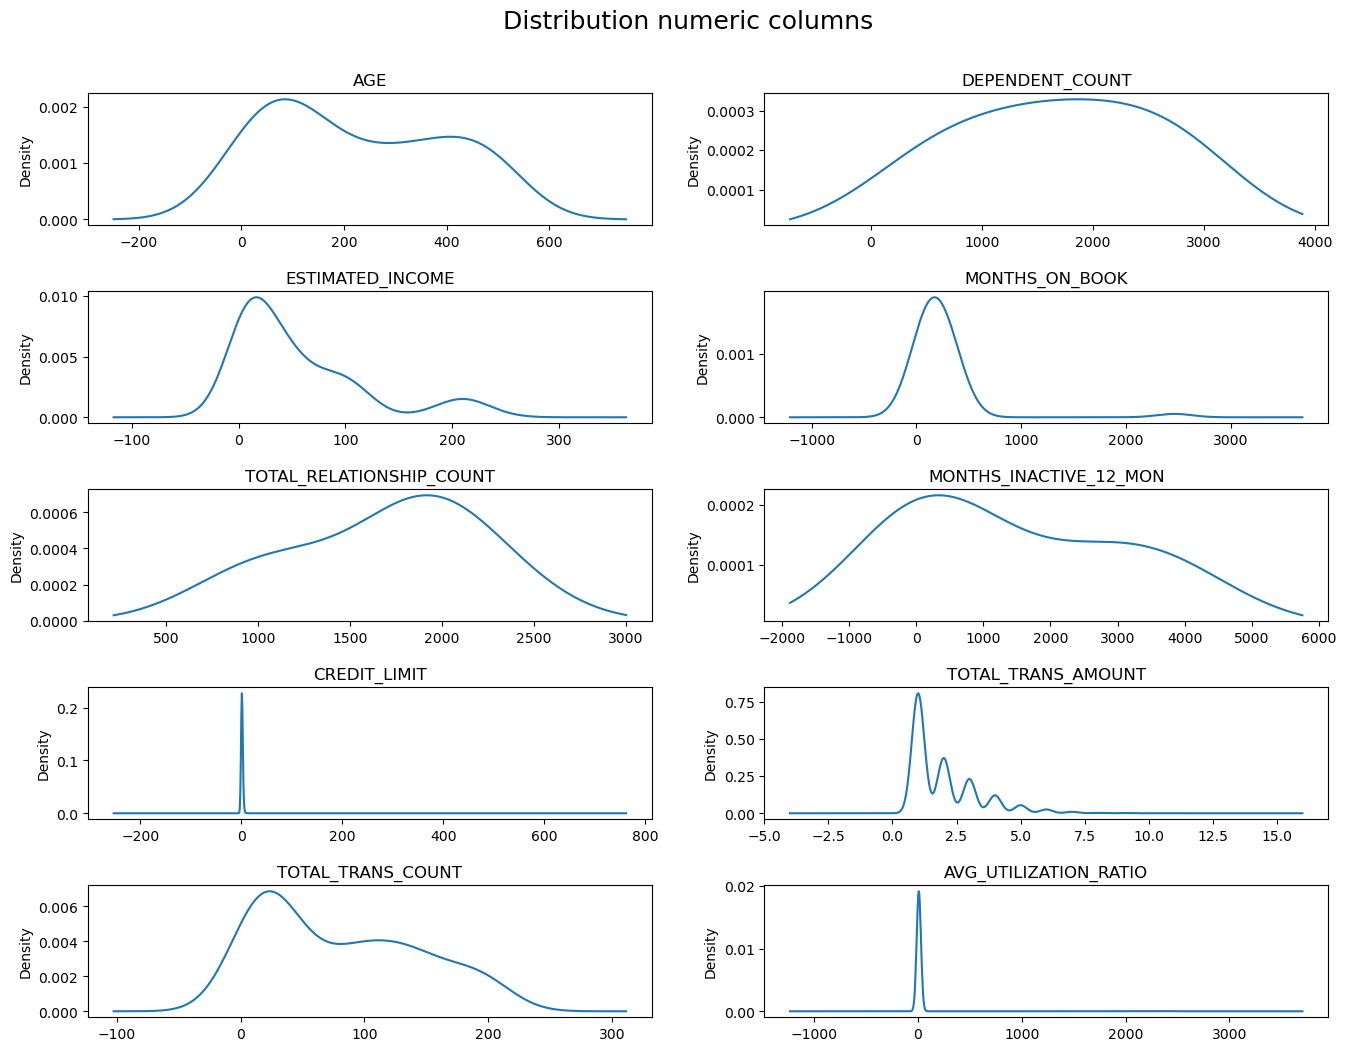

In [10]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution numeric columns", fontsize=18, y=0.95)
for i, value in enumerate(df_num):
    ax=plt.subplot(5,2, i+1)
    df_num[value].value_counts().plot(kind="kde", ax=ax)
    ax.set_title(value.upper())

In [11]:
customers_modif=df.copy()

In [12]:
customers_modif["gender"]=customers_modif["gender"].replace(["F","M"], [0,1])

In [13]:
customers_modif["education_level"]=customers_modif["education_level"].replace(["Uneducated","High School", "College","Graduate", "Post-Graduate", "Doctorate"], [0,1,2,3,4,5])

In [14]:
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


In [15]:
df1=pd.get_dummies(customers_modif[["marital_status"]], drop_first=True)
customers_modif=pd.concat([customers_modif, df1], axis=1)
customers_modif=customers_modif.drop("marital_status", axis=1)

In [16]:
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


In [17]:
customers_modif=customers_modif.drop("customer_id", axis=1)

In [18]:
scaler=StandardScaler()
scaler.fit(customers_modif)
df2=scaler.transform(customers_modif)
print(df2)

[[-0.16540558  1.05995565  0.50336813 ...  1.07733799 -0.79850685
  -0.28260887]
 [ 0.33357038 -0.9434357   2.04319867 ... -0.92821381  1.2523374
  -0.28260887]
 [ 0.58305837  1.05995565  0.50336813 ...  1.07733799 -0.79850685
  -0.28260887]
 ...
 [-0.29014957 -0.9434357  -1.03646242 ...  1.07733799 -0.79850685
  -0.28260887]
 [-2.03656544  1.05995565 -0.26654715 ... -0.92821381 -0.79850685
   3.53845931]
 [-0.41489356 -0.9434357  -0.26654715 ...  1.07733799 -0.79850685
  -0.28260887]]


In [19]:
df2=pd.DataFrame(df2)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.662787,-0.281380,0.509840,-0.522785,-0.337598,-0.509330,3.259358,2.221481,0.678714,-0.928214,1.252337,-0.282609
10123,-0.664382,1.059956,-0.266547,0.662787,-0.560775,-1.368442,0.120579,-0.337598,-0.479181,1.283475,0.176440,0.856458,-0.928214,-0.798507,-0.282609
10124,-0.290150,-0.943436,-1.036462,-0.752211,-0.738571,0.008965,0.763943,0.651940,-0.354626,1.732994,-0.207005,-0.997155,1.077338,-0.798507,-0.282609
10125,-2.036565,1.059956,-0.266547,0.662787,-0.382978,0.008965,0.120579,0.651940,-0.368710,1.174848,-0.121795,-0.997155,-0.928214,-0.798507,3.538459


In [20]:
inertia=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(df2)
    inertia.append(km.inertia_)

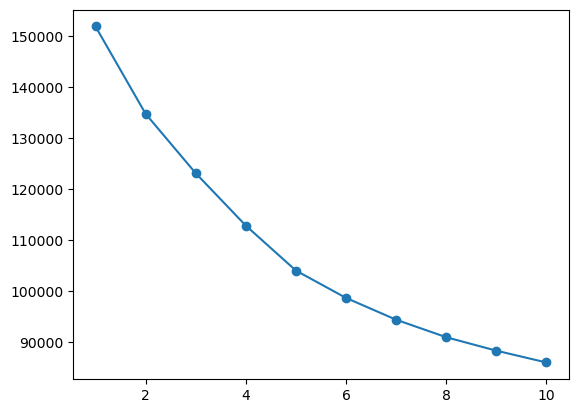

In [21]:
plt.plot(range(1,11), inertia, marker="o")
plt.show()

The best k parameter is 7 becuase then the reduction of distance is not so relevent as we can see for the lower values of k.

In [22]:
model=KMeans(n_clusters=7)
clusters=model.fit_predict(df2)
print(clusters)

[6 0 6 ... 5 2 5]


In [23]:
df["CLUSTER"]=clusters+1

In [24]:
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,7
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,1
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,7
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,3
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,7


In [25]:
numeric=["age", "dependent_count", "estimated_income", "months_on_book", "total_relationship_count", "months_inactive_12_mon", "credit_limit", "total_trans_amount", "total_trans_count", "avg_utilization_ratio"]

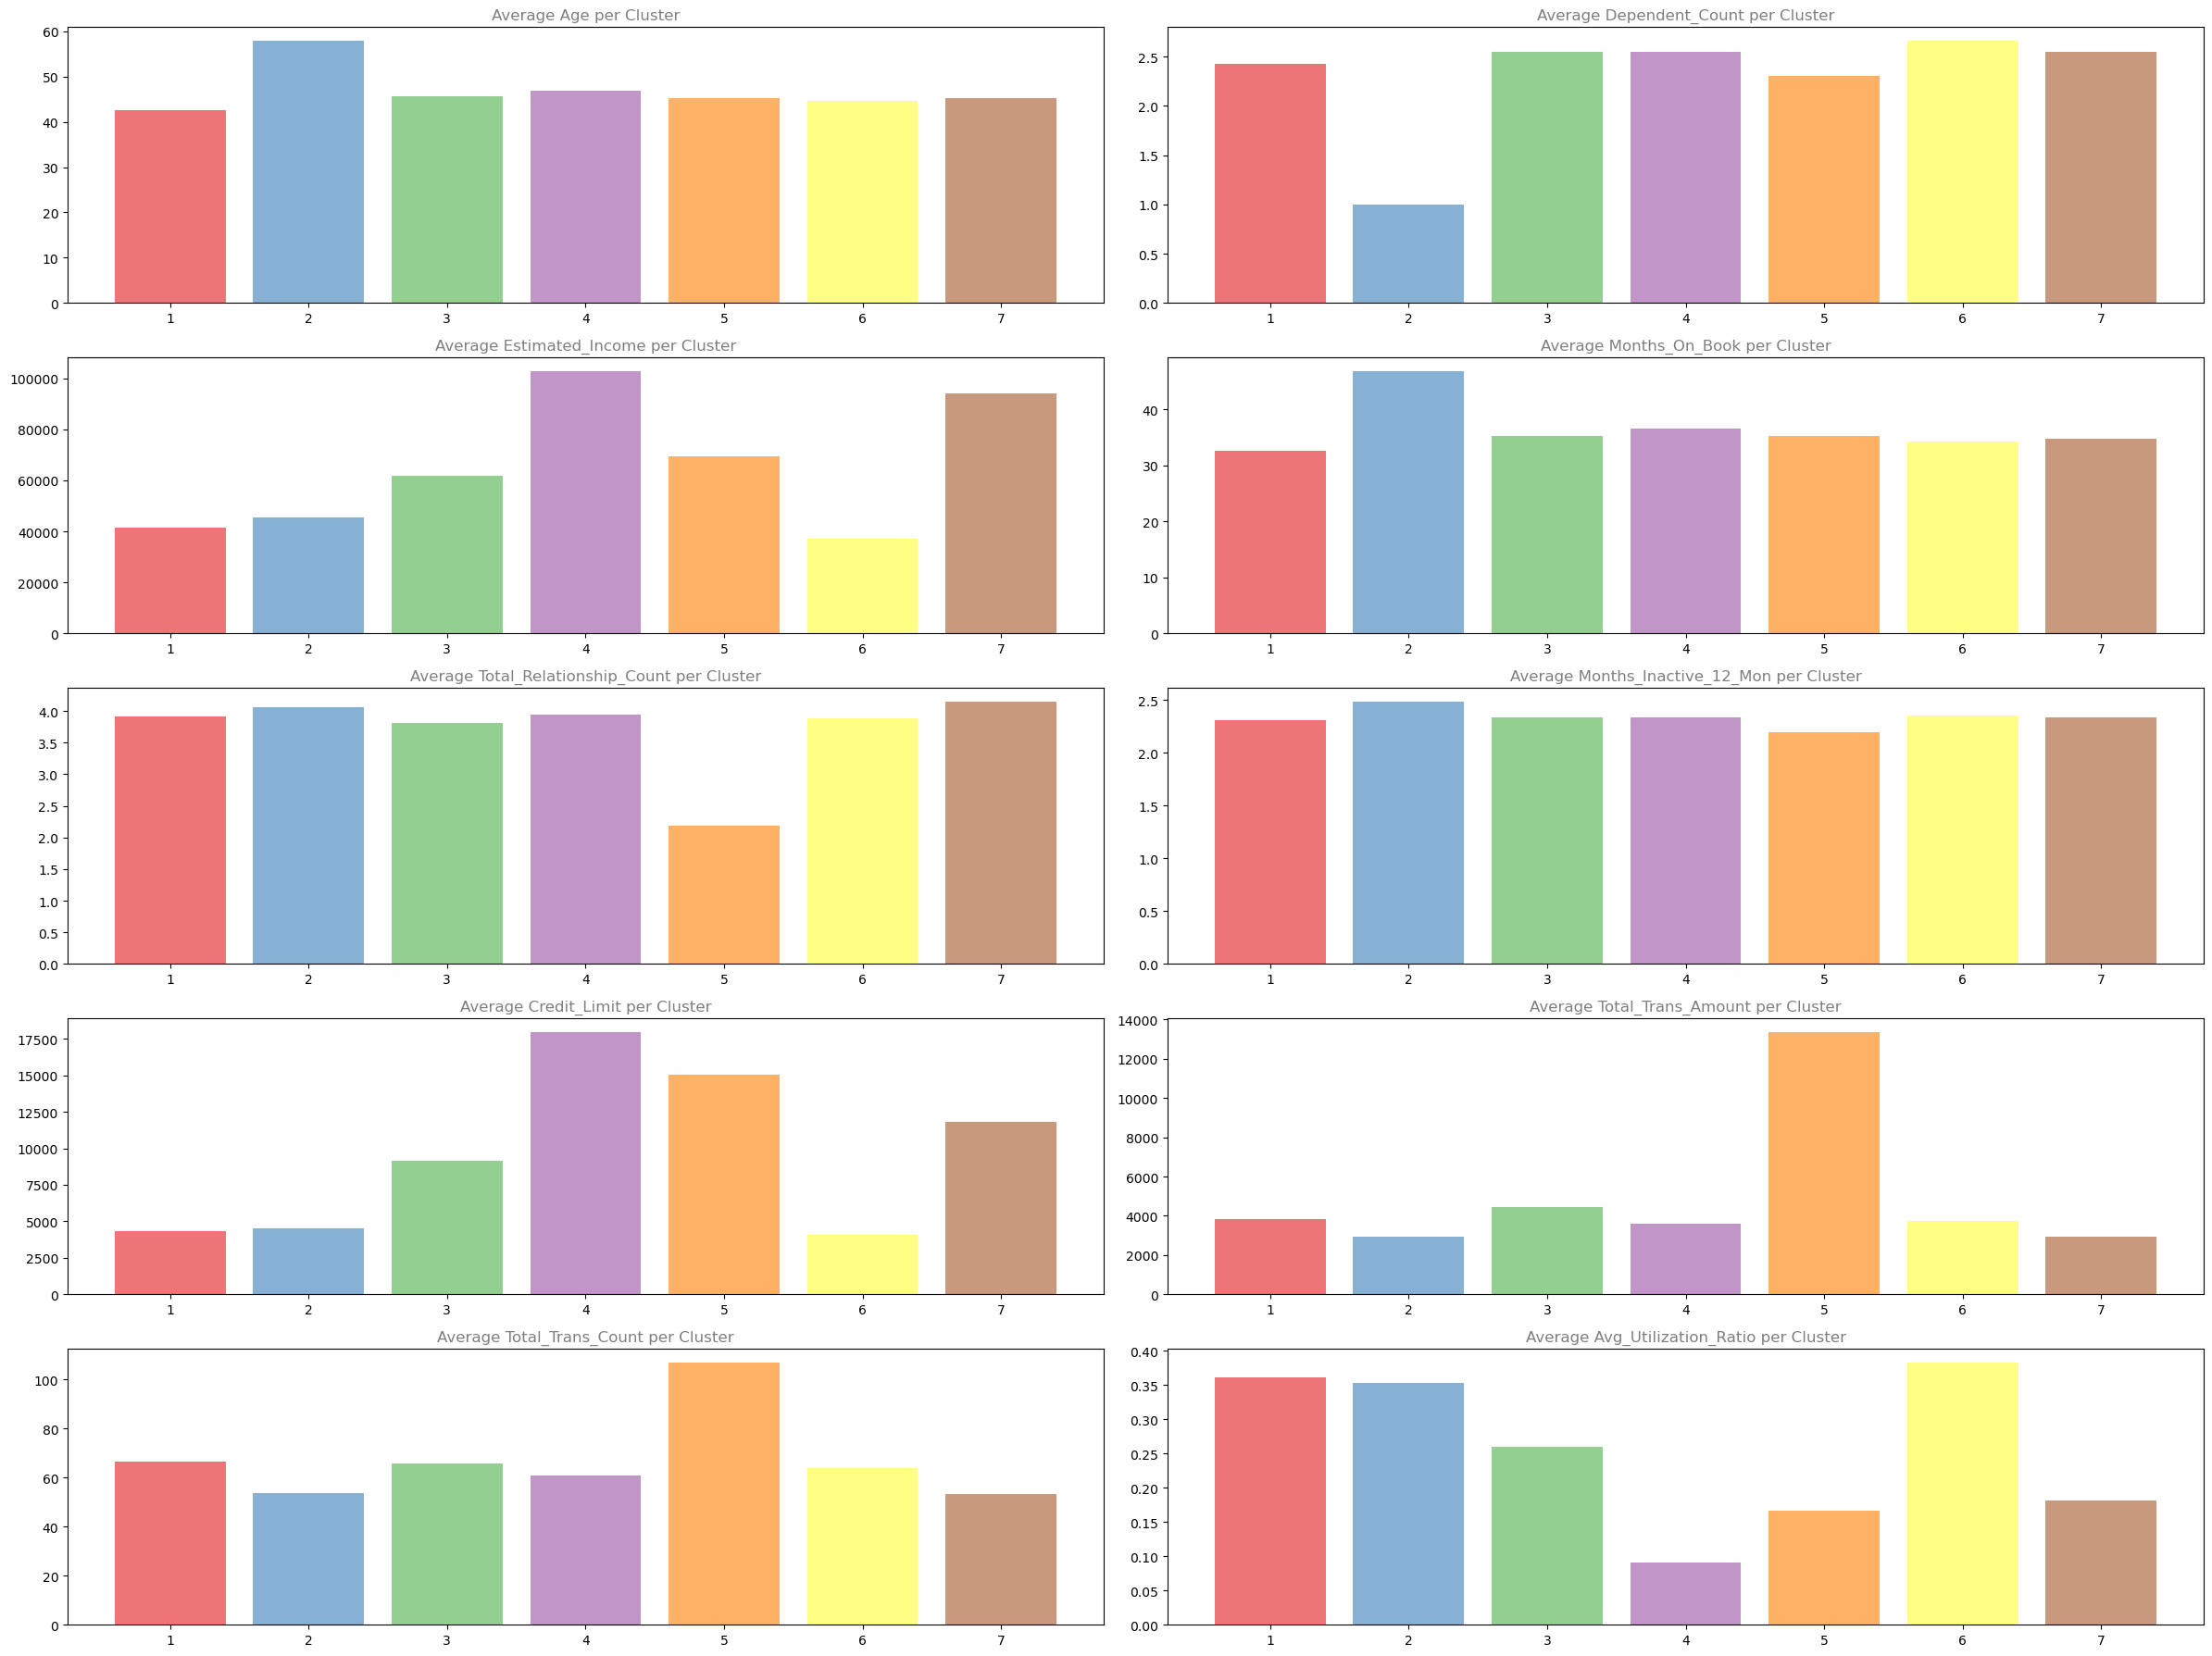

In [34]:
fig = plt.figure(figsize=(24, 18))
for i, column in enumerate(numeric):
    df_plot = df.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.10/site-

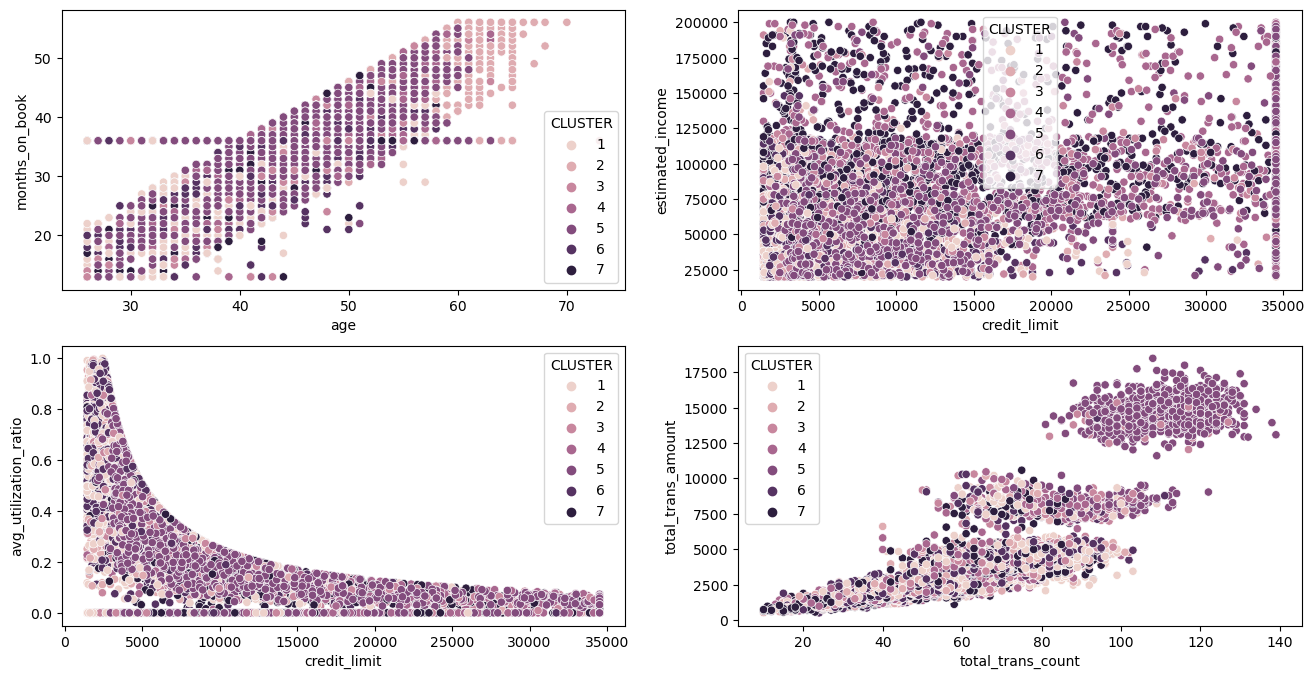

In [45]:
fig,ax=plt.subplots(2,2, figsize=(16,8))
sns.scatterplot("age", "months_on_book", hue="CLUSTER", data=df, ax=ax[0,0])
sns.scatterplot("credit_limit", "estimated_income", hue="CLUSTER", data=df, ax=ax[0,1])
sns.scatterplot("credit_limit", "avg_utilization_ratio", hue="CLUSTER", data=df, ax=ax[1,0])
sns.scatterplot("total_trans_count", "total_trans_amount", hue="CLUSTER", data=df, ax=ax[1,1])
plt.show()

It was calculated the correlation before and now, up, it is displayed the variables with an higher correlation divided by cluster. In the other graph, it was displayed the average value for numeric columns grouped by cluster. 


/tmp/ipykernel_125/2893166212.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
/tmp/ipykernel_125/2893166212.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
/tmp/ipykernel_125/2893166212.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])


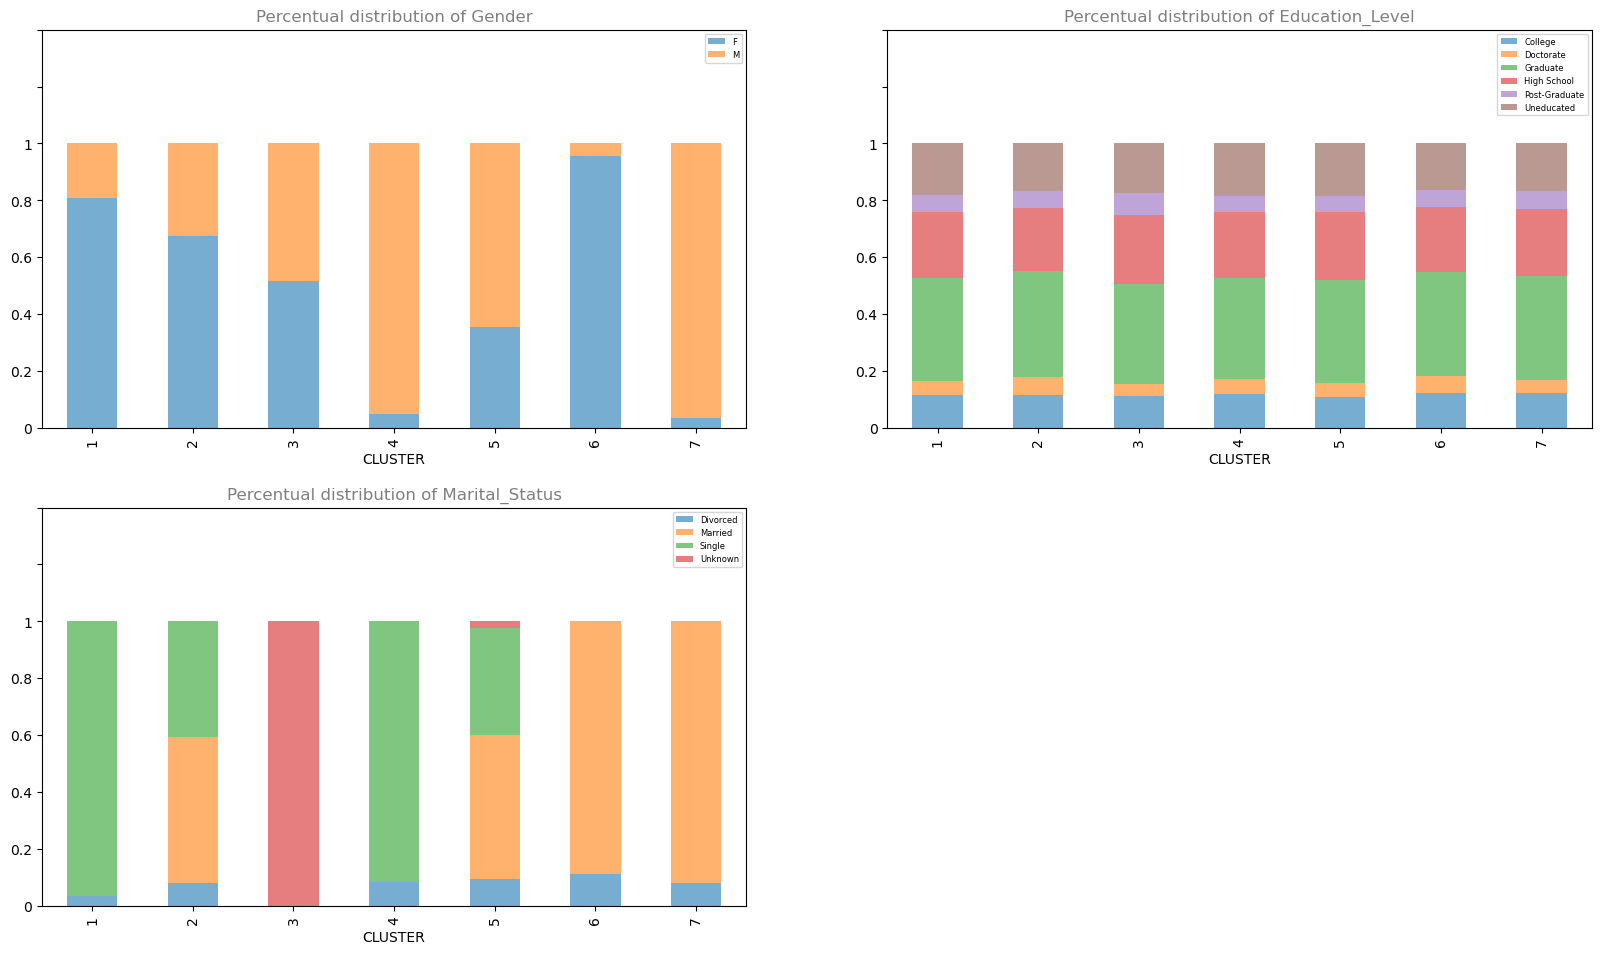

In [67]:
cat=["gender", "education_level", "marital_status"]
fig = plt.figure(figsize=(20, 30))
for i, value in enumerate(cat):
    perc_df=pd.crosstab(index=df["CLUSTER"], columns=df[value], values=df[value], aggfunc="size", normalize="index")
    ax = fig.add_subplot(5, 2, i+1)
    perc_df.plot.bar(stacked=True, alpha=0.6, ax=ax)
    ax.set_title(f'Percentual distribution of {value.title()}', alpha=0.5)
    ax.xaxis.grid(False)
    ax.set_ylim(0,1.4)
    plt.legend(fontsize=6)
    ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
plt.show()

## Cluster 1:
There are more female customers, single, with a higher utlization ratio and a high estimated income.
## Cluster 4:
THe fourth one is characterized by a higher presence of males, single people, with a higher credit limit and a high age.
## Cluster 7:
High percentage of graduated people, high total relationship count and a high number of people doesn't use the credit card since 12 months. 